<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ciara Farrell  
ID:C00294114

This notebook looks at linear regression.  
Linear regression is the first machine learning technique looked at in class.  
The most straigh forward method of linear regression is fitting a straight line to given data.  
This is done by using the equation of a line y=mx+c .

In linear regression the following can be changed:  
* the y variable changes as the x one does.  
* changing either the slope or y intercept of the line equation chnages the line of best fit.  
* changing the test/train data split changes the percentage of data points used to test and train the model.
* random_state: this chooses the number generation randomly depending on the value chosen, it can be any integer number.  
* s: the size the blobs are plotted on the graph

To begin with the following libaries need to be called before linear regression can begin.  
It is important to call the LinearRegression module as that is the machine learning method being carried out in this notebook.  
From sklearn.model_selection import train_test_split is also important as it allows for the splitting of the data into random train and test subsets.


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Part A**  
To begin, in order to farmilarise myself with linear regression I edit JakeVanderPlas' siple linear regression model from https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html .  
I change how the points are created by using the rand function to create 60 random integrer points that range from 0 to 15 for x.   
I change how y is generated by using a different equation.
For y I take the x values multiply them by 3 add 6 and the 60 random integrer points to it.   
I then plot the x vs the y points.  
The random state is set to 3.

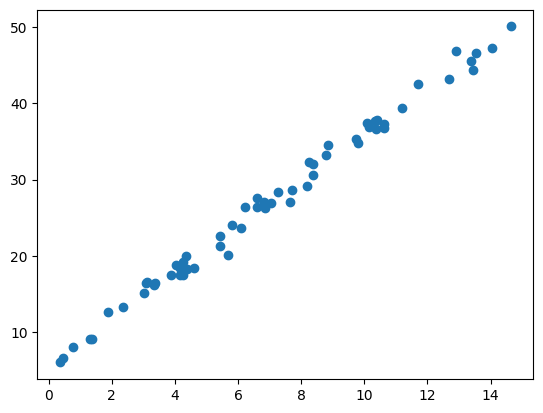

In [22]:
rng = np.random.RandomState(3)
x = 15 * rng.rand(60)
y = 3 * x +6 + rng.randn(60)
plt.scatter(x, y);

Now using the linear regression from scikit-learn it is possible to fit the best line to this data.  
The xfit line space was increased from (0,0,500) to (0,15,500) in order to fit all the points of the data.  
This generates 500 samples within the start and stop values of the sequence.    
The model is then used to try predict the y values.  
xfit and yfit correspond to the line of best fit.  
The line of best fit (green) is then plotted onto the scatter plot of the previous x and y values.

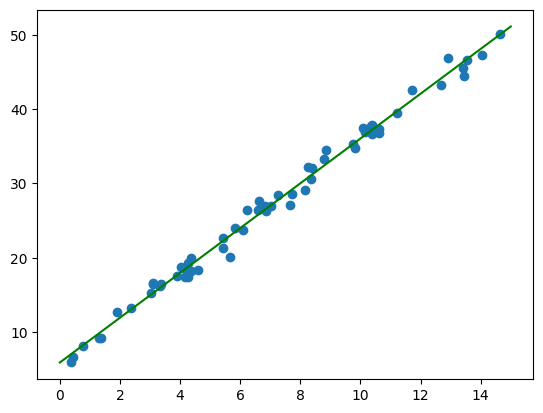

In [23]:

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 15, 500)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'g');

It is then possible to print the slope and interept of the corresponding line of best fit.

In [24]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


Model slope:     3.0121264213359016
Model intercept: 5.922997894392601


Now that i have a basic understanding of linear regression i can now try use it with a dataset.  
I began with by looking at https://github.com/srafay/Machine_Learning_A-Z/blob/master/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/simple_linear_regression.py attempt at linear regression and trying to follow along.  
Firstly I imported the raw csv file from github and read it as a csv.  
The csv looks at years experience vs salary and contains 30 rows of data.

In [25]:
data = 'https://raw.githubusercontent.com/srafay/Machine_Learning_A-Z/master/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/Salary_Data.csv'
data_df = pd.read_csv(data)

I set the x values to be the years experience and the y values to be the salary as done in the sample on the github.  
Then i plotted the values.

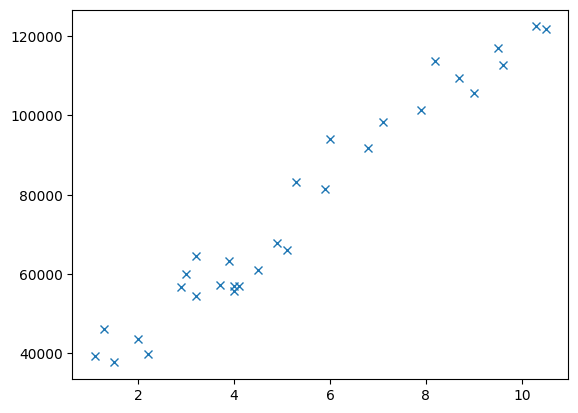

In [26]:
x = data_df.iloc[:, :-1]
y = data_df.iloc[:, 1]
plt.plot(x,y, 'x')

From here i took a slightly different approach from the example.  
I decided to look at the correlation between the x and y variables to check it had a high correlation value.  
It has a correlation coefficient of ~0.98 which means the data is highly correlated.

In [27]:
data_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Next I began to split the dataset into test and train sets.  
Both the x and y test/train are designated using the train_test_split this takes both the x and y array and sets the test size of the data to be used.  
I chose this value to be 0.20, this means that 20% of the data (6 data points) is used to train the model.   
the train set is the other 80% of the data.   
The random state is set to 1 and it controls the data shuffle before it is split into test and train sets.  


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.20, random_state = 1)

Next the variable model is set to linear regression.  
Linear regression is the fitted to the x_train and y_train values.

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

The Training set results can then be visualised with the line of best fit applied to it.

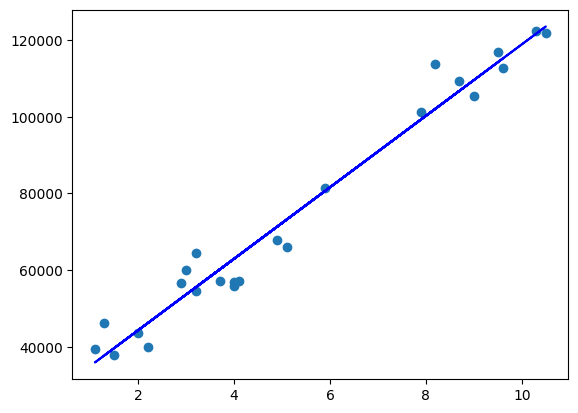

In [30]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color = 'blue')


By importing statsmodels.api as sm it is possible to get information about the best fit model such as its intercept and constant value and its accosiacted errors.  
When printing the model summary it can be seen that the constant value accosciated with the best fit line for the train data is 2.561e+04.  
The slope is 9332.9447.

In [31]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_sm).fit()

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     660.3
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           6.69e-18
Time:                        10:41:01   Log-Likelihood:                -239.48
No. Observations:                  24   AIC:                             483.0
Df Residuals:                      22   BIC:                             485.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.561e+04   2204.674     

**Part B**  
I now attempt to perform linnear regression on a different dataset using what i have learned from the previous two examples.  
The data is once again taken from git hub and it describes a persons age in years vs the salary income they recieve in dollars.  
The data set contains 22 rows.

In [33]:
pract = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-income-age-group.csv'
daf = pd.read_csv(pract)
daf

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


The x values are set to be the persons age and the y values are set to be the persons salary.  
The data is then plotted against each other.

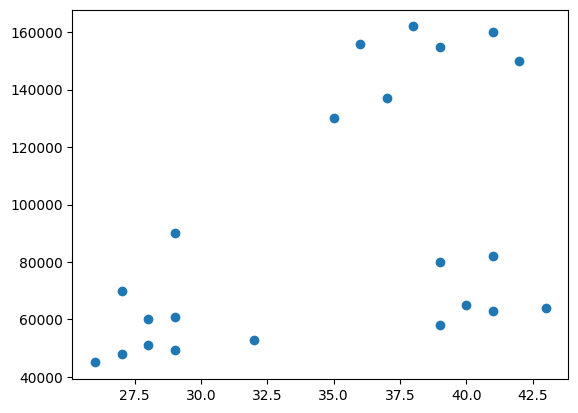

In [34]:
yy = daf.iloc[:, 2]
xx = daf.iloc[:, 1]
plt.plot(xx,yy, 'o')

Next the data needs to be split into test and train sets.  
Both the x and y test/train are designated using the train_test_split this takes both the x and y array and sets the test size of the data to be used.  
I chose the test value to be 0.32, this means that 32% of the data (7 data points) is used to train the model.
The reason this value is used is because anothing smaller gives an decimal number of the test set, this is not suitable for the model as half a data point can't be used only full data points.  

The train set is the other 68% of the data.   
The random state is set to 1 and it controls the data shuffle before it is split into test and train sets.

In [35]:
xx_train,xx_test,yy_train, yy_test = train_test_split(xx,yy, train_size = 0.68, test_size = 0.32, random_state = 100)

In [36]:
import statsmodels.api as sm
xx_train_sm = sm.add_constant(xx_train)
model = sm.OLS(yy_train, xx_train_sm).fit()

Getting the model summary for the data.

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Income($)   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     8.270
Date:                Wed, 28 Feb 2024   Prob (F-statistic):             0.0139
Time:                        10:41:02   Log-Likelihood:                -166.39
No. Observations:                  14   AIC:                             336.8
Df Residuals:                      12   BIC:                             338.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -8.79e+04   6.36e+04     -1.382      0.1

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the model summary using the 0.32:0.68 split of the data the best fit Paramaters for the model are a constant of  -8.79e+04 and a slope of 5333.4473.  
This is plotted on below.  

when different tests and train splits are used these values change for example if the data is split 20:80.  
There is a huge difference in the model.  
The constant is -3.613e+04 and the slope is 3646.2536

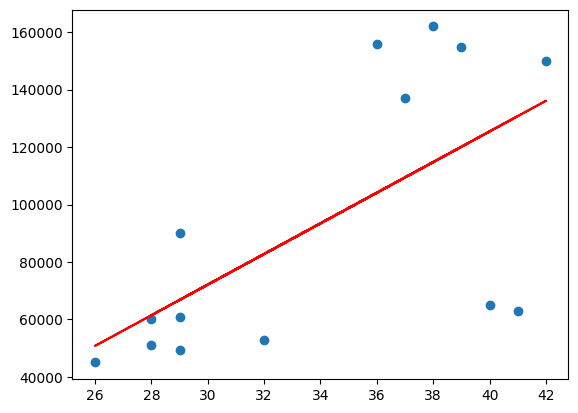

In [38]:
plt.scatter(xx_train,yy_train)
plt.plot(xx_train, -8.79e+04 + xx_train * 5333.4473,'r')
plt.show()

With the 20:80 data split the train data plot has more points than the 0.32:0.68.  
3 more to be exact.  
While this may not seem like much of a difference when the data set is so small as the one being used in this example, each point counts.  
In machine learing the training data needs to be as large as possible in order to give enough information to the model for it to find the line of best fit.  
For this reason I am taking the line -3.613e+04 + xx_train * 3646.2536 , to be the line of best fit for the data.

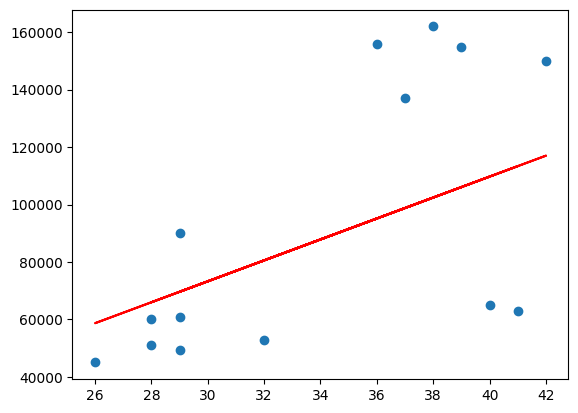

In [39]:
plt.scatter(xx_train,yy_train)
plt.plot(xx_train, -3.613e+04 + xx_train * 3646.2536,'r')
plt.show()

Checking the correlation of the data.  
It has a vlaue of ~0.5 which means the data is moderately correlated

In [40]:
daf.corr()

<ipython-input-40-43953c865ecb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  daf.corr()


,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


I want to try linear regression on a dataset with a higher correlation and more data points to see what difference this makes.  
Once again importing a dataset from github.  
This data set contains multiple columns regarding different car aspects and is 205 rows long.  
The two cloumns I am intrested in are horsepower and price as i want to see the the horsepower a car has is linear to its price.

In [41]:
d = 'https://raw.githubusercontent.com/mahatosourav91/Linear-Regression/master/CarPrice_Assignment.csv'
d_df = pd.read_csv(d)
d_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


i set the x values to be horsepower and the y values to be price

In [42]:
y_y = d_df.iloc[:, -1]
x_x = d_df.iloc[:, -5]

the correlation between these two columns is 0.8.  
this means there is a strong positive relationshsip between the two columns

In [43]:
d_df['horsepower'].corr(d_df['price'])

0.8081388225362212

plotting horsepower vs price.  
the data points are displayed as dots.  
it is noticable on this graph compared to the others the sheer difference of the amount of data points as there is 205 of them on the graph.

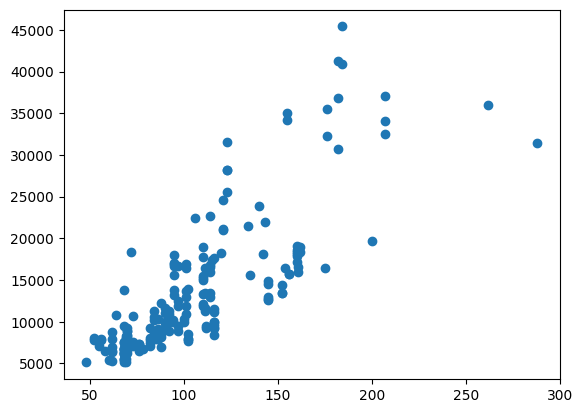

In [44]:
plt.plot(x_x,y_y, 'o')

The data is then split into test and train sets.  
Both the x and y test/train are designated using the train_test_split this takes both the x and y array and sets the test size of the data to be used.  
For this data i decided to try three different splits.  
the first split i did was 0.3:0.7  
the second split was 0.25:0.75  
the last split was 0.2:0.8  
the random state was set to 100

first split 0.3:0.7  
train_size was set to 0.7  
test_size was set to 0.3

In [45]:
x_x_train,x_x_test,y_y_train, y_y_test = train_test_split(x_x,y_y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [46]:
import statsmodels.api as sm
x_x_train_sm = sm.add_constant(x_x_train)
model = sm.OLS(y_y_train, x_x_train_sm).fit()

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           6.04e-34
Time:                        10:41:02   Log-Likelihood:                -1409.0
No. Observations:                 143   AIC:                             2822.
Df Residuals:                     141   BIC:                             2828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3192.6506   1076.508     -2.966      0.0

From the model summary using the 0.3:0.7 split of the data the best fit Paramaters for the model are a constant of  -3192.6506 and a slope of 158.4457.  
This is plotted on below.

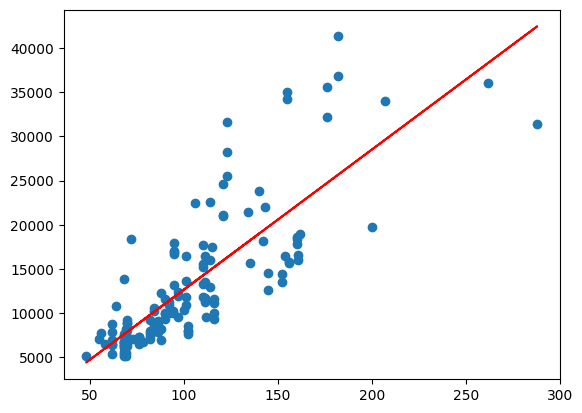

In [48]:
plt.scatter(x_x_train,y_y_train)
plt.plot(x_x_train, -3192.6506 + x_x_train * 158.4457,'r')
plt.show()

second split 0.25:0.75  
train_size was set to 0.75  
test_size was set to 0.25

In [49]:
x_x_train,x_x_test,y_y_train, y_y_test = train_test_split(x_x,y_y, train_size = 0.75, test_size = 0.25, random_state = 100)

In [50]:
import statsmodels.api as sm
x_x_train_sm = sm.add_constant(x_x_train)
model = sm.OLS(y_y_train, x_x_train_sm).fit()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     295.2
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           2.38e-37
Time:                        10:41:03   Log-Likelihood:                -1506.1
No. Observations:                 153   AIC:                             3016.
Df Residuals:                     151   BIC:                             3022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3305.2287   1022.195     -3.233      0.0

From the model summary using the 0.25:0.75 split of the data the best fit Paramaters for the model are a constant of  -3305.2287 and a slope of 159.8080  
This is plotted on below.

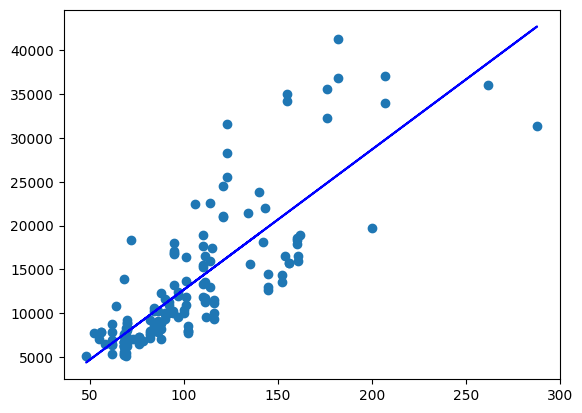

In [52]:
plt.scatter(x_x_train,y_y_train)
plt.plot(x_x_train, -3305.2287 + x_x_train * 159.8080,'b')
plt.show()

third split 0.2:0.8  
train_size was set to 0.8  
test_size was set to 0.2

In [53]:
x_x_train,x_x_test,y_y_train, y_y_test = train_test_split(x_x,y_y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [54]:
import statsmodels.api as sm
x_x_train_sm = sm.add_constant(x_x_train)
model = sm.OLS(y_y_train, x_x_train_sm).fit()

In [55]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     314.9
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           7.96e-40
Time:                        10:41:03   Log-Likelihood:                -1611.1
No. Observations:                 164   AIC:                             3226.
Df Residuals:                     162   BIC:                             3232.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3283.9339    969.914     -3.386      0.0

From the model summary using the 0.2:0.8 split of the data the best fit Paramaters for the model are a constant of  -3283.9339 and a slope of 158.7850 .  
This is plotted on below.

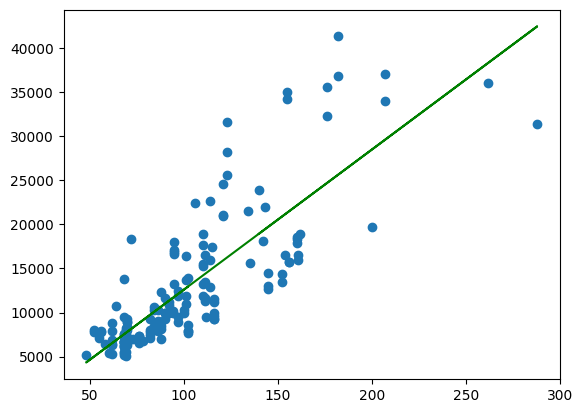

In [56]:
plt.scatter(x_x_train,y_y_train)
plt.plot(x_x_train, -3283.9339 + x_x_train * 158.7850,'g')
plt.show()

Similary enough the the age vs salary example, when more points are added to the training data the more percise the model tends to be.  
this can be shown in the three graphs above as when more data is added to the training set the more the paramaters of the line and its associated errors decrease.  

It would probaly reduce again if i tested a 15:85 split with the data.  
But I did not do this as the test data for 15% would then become too small as it would only include 31 overall points which is ten less than 20% 41 respective points.  

Due to this i am assuming -3283.9339 + x_x_train * 158.7850 is the line of best fit for this data.  
As it seemes to cut the data is half on either side of the line


There is no confusion matrix it is used to check accuracy of classification models.   
Linear regression does not involve classification